C:\Users\Vasanth Kumar C\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Vasanth Kumar C\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step

Emotion Probabilities:
angry: 3.30%
calm: 0.00%
disgust: 4.37%
fear: 6.62%
sad: 83.77%
neutral: 1.87%
happy: 0.06%
surprise: 0.00%

Predicted emotion: sad

Sincerity Score: 0.02
Enthusiasm Score: 0.00

Audio Playback:


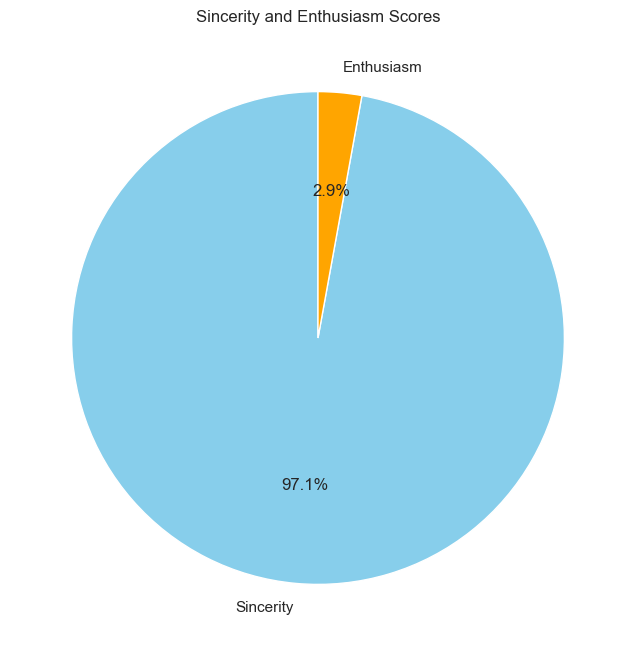

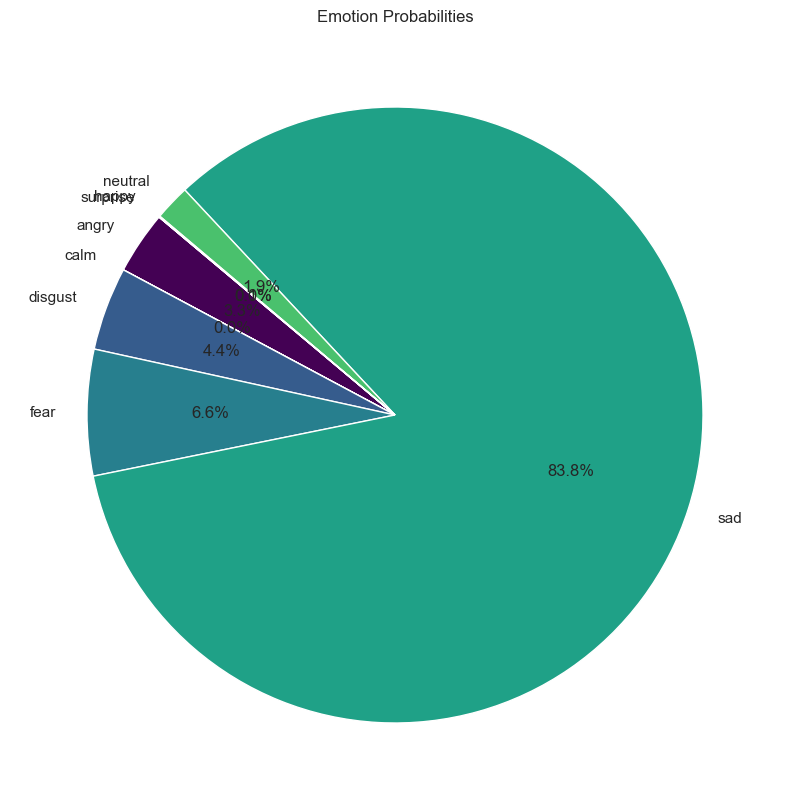

Dashboard displayed for audio: D://Internships//Test Project//mark_0//recorded_audio.wav


In [ ]:
from IPython.display import Audio, display
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import librosa
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

def predict_emotion_with_scores(audio_path):
    # Load the trained model
    model_path = 'D://Internships//Test Project//mark_1//emotion-recognition.h5'
    model = load_model(model_path)
    
    # Load and preprocess the audio file
    data, sample_rate = librosa.load(audio_path, duration=3, offset=0.5, res_type='kaiser_fast')
    
    # Extract features (MFCC)
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    
    # Reshape the features and fit the scaler
    features = np.array(mfccs_processed).reshape(1, -1)  # Reshape to 2D array for the scaler
    
    # Fit the scaler on the current features
    scaler.fit(features)  # Fit the scaler on the current feature set
    features_scaled = scaler.transform(features)  # Now, scale the features
    
    # Reshape for model input
    features_scaled = np.expand_dims(features_scaled, axis=2)
    
    # Predict emotion
    predictions = model.predict(features_scaled)
    
    # Get the predicted emotion
    emotions = ['angry', 'calm', 'disgust', 'fear', 'sad', 'neutral', 'happy', 'surprise']
    predicted_emotion = emotions[np.argmax(predictions[0])]
    
    # Print probabilities for each emotion
    print("\nEmotion Probabilities:")
    for emotion, prob in zip(emotions, predictions[0]):
        print(f"{emotion}: {prob:.2%}")
    
    print(f"\nPredicted emotion: {predicted_emotion}")
    
    # Calculate sincerity and enthusiasm scores
    sincerity_emotions = {'calm', 'neutral', 'happy'}
    enthusiasm_emotions = {'happy', 'surprise'}
    
    sincerity_score = sum(prob for emotion, prob in zip(emotions, predictions[0]) if emotion in sincerity_emotions)
    enthusiasm_score = sum(prob for emotion, prob in zip(emotions, predictions[0]) if emotion in enthusiasm_emotions)
    
    print(f"\nSincerity Score: {sincerity_score:.2f}")
    print(f"Enthusiasm Score: {enthusiasm_score:.2f}")
    
    # Display audio player
    print("\nAudio Playback:")
    display(Audio(audio_path))
    
    # Return the scores for dashboard
    return sincerity_score, enthusiasm_score, predicted_emotion, predictions[0]

def show_dashboard(audio_path):
    sincerity_score, enthusiasm_score, predicted_emotion, emotion_probs = predict_emotion_with_scores(audio_path)
    
    # Pie Chart for Sincerity and Enthusiasm Scores
    plt.figure(figsize=(5, 5))
    labels = ['Sincerity', 'Enthusiasm']
    scores = [sincerity_score, enthusiasm_score]
    colors = ['skyblue', 'orange']
    plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title("Sincerity and Enthusiasm Scores")
    plt.show()
    
    # Pie Chart for Emotion Probabilities
    plt.figure(figsize=(5, 5))
    plt.pie(emotion_probs, labels=['angry', 'calm', 'disgust', 'fear', 'sad', 'neutral', 'happy', 'surprise'], 
            autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(emotion_probs))))
    plt.title("Emotion Probabilities")
    plt.show()
    
    print(f"Dashboard displayed for audio: {audio_path}")

# Example usage:
audio_path = "D://Internships//Test Project//mark_0//recorded_audio.wav"
show_dashboard(audio_path)


C:\Users\Vasanth Kumar C\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Vasanth Kumar C\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Total audio duration: 9.00 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

Overall Emotion Probabilities:
angry: 3.30%
calm: 0.00%
disgust: 4.37%
fear: 6.62%
sad: 83.77%
neutral: 1.87%
happy: 0.06%
surprise: 0.00%

Overall Sincerity Score: 0.02
Overall Enthusiasm Score: 0.00


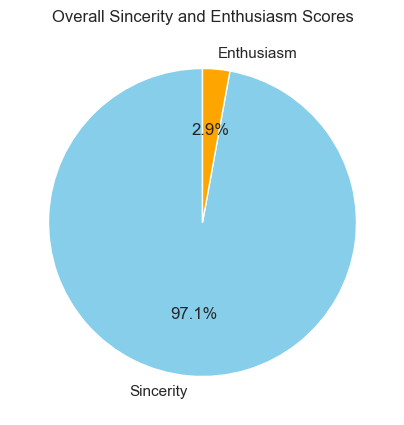

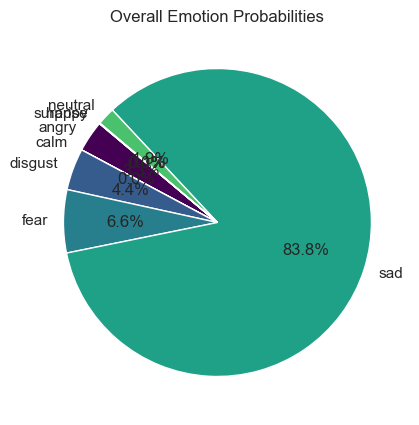

Dashboard displayed for audio: D://Internships//Test Project//mark_1//Test.wav


In [3]:
from IPython.display import Audio, display
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

def process_audio_chunk(audio_data, model, sr=22050):
    # Extract features (MFCC)
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    
    # Reshape the features and scale
    features = np.array(mfccs_processed).reshape(1, -1)
    scaler.fit(features)  # Fit the scaler on the chunk
    features_scaled = scaler.transform(features)
    
    # Reshape for model input
    features_scaled = np.expand_dims(features_scaled, axis=2)
    
    # Predict emotion
    predictions = model.predict(features_scaled)
    
    return predictions[0]

def evaluate_audio_file(audio_path, chunk_duration=4):
    # Load the trained model
    model_path = 'D://Internships//Test Project//mark_1//emotion-recognition.h5'
    model = load_model(model_path)
    
    # Load the audio file
    data, sr = librosa.load(audio_path, sr=22050)
    total_duration = librosa.get_duration(y=data, sr=sr)
    print(f"Total audio duration: {total_duration:.2f} seconds")
    
    # Process in 4-second chunks
    chunk_scores = []
    for start in range(0, int(total_duration), chunk_duration):
        end = min(start + chunk_duration, int(total_duration))
        chunk_data = data[start * sr:end * sr]
        if len(chunk_data) > 0:
            chunk_scores.append(process_audio_chunk(chunk_data, model, sr))
    
    # Aggregate results
    avg_scores = np.mean(chunk_scores, axis=0)
    emotions = ['angry', 'calm', 'disgust', 'fear', 'sad', 'neutral', 'happy', 'surprise']
    
    # Calculate sincerity and enthusiasm scores
    sincerity_emotions = {'calm', 'neutral', 'happy'}
    enthusiasm_emotions = {'happy', 'surprise'}
    
    sincerity_score = sum(avg_scores[emotions.index(emotion)] for emotion in sincerity_emotions)
    enthusiasm_score = sum(avg_scores[emotions.index(emotion)] for emotion in enthusiasm_emotions)
    
    print("\nOverall Emotion Probabilities:")
    for emotion, prob in zip(emotions, avg_scores):
        print(f"{emotion}: {prob:.2%}")
    
    print(f"\nOverall Sincerity Score: {sincerity_score:.2f}")
    print(f"Overall Enthusiasm Score: {enthusiasm_score:.2f}")
    
    return avg_scores, sincerity_score, enthusiasm_score

def show_dashboard_for_full_audio(audio_path):
    avg_scores, sincerity_score, enthusiasm_score = evaluate_audio_file(audio_path)
    
    # Pie Chart for Sincerity and Enthusiasm Scores
    plt.figure(figsize=(5, 5))
    labels = ['Sincerity', 'Enthusiasm']
    scores = [sincerity_score, enthusiasm_score]
    colors = ['skyblue', 'orange']
    plt.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title("Overall Sincerity and Enthusiasm Scores")
    plt.show()
    
    # Pie Chart for Emotion Probabilities
    plt.figure(figsize=(5, 5))
    plt.pie(avg_scores, labels=['angry', 'calm', 'disgust', 'fear', 'sad', 'neutral', 'happy', 'surprise'], 
            autopct='%1.1f%%', startangle=140, colors=plt.cm.viridis(np.linspace(0, 1, len(avg_scores))))
    plt.title("Overall Emotion Probabilities")
    plt.show()
    
    print(f"Dashboard displayed for audio: {audio_path}")

# Example usage:
audio_path = "D://Internships//Test Project//mark_1//Test.wav"
show_dashboard_for_full_audio(audio_path)
